In [1]:
import os
import pandas as pd 
from fbprophet import Prophet

import plotly.express as px 
import plotly.graph_objs as go
import plotly.io as pio

from dateutil.relativedelta import relativedelta


pio.templates.default = "plotly_white"

print(f"cwd : {os.getcwd()}")

/Users/imantha/Software/miniforge3/envs/tsEnv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cwd : /Users/imantha/workspace/cryo-polygen/ts


In [2]:
def load_data(path, last_date = "2022-05-18 23:00:00"):
    df = pd.read_excel(path, header = None)
    df.rename(columns = {0 : "y"}, inplace = True)
    last_ts = pd.to_datetime(last_date, format = "%Y-%m-%d %H:%M:%S")
    ts = [last_ts - relativedelta(hours=  x) for x in range(df.shape[0])]
    ts.sort()
    df["ds"] = ts
    return df 



In [3]:
df = load_data(path = os.path.join("data","load.xlsx"))
print(df.shape)
p = px.line(x = df.ds, y = df.y)
p.show()

(4380, 2)


In [22]:
px.histogram(x = df.y, marginal = "violin")

In [5]:
test_size = int(0.3 * df.shape[0])
df_train = df[:-test_size]
df_test = df[-test_size:]

print(f"df_train shape : {df_train.shape}")
print(f"df_test shape : {df_test.shape}")

print(f"Total data, start date : {df.ds.values[0]}, end_date : {df.ds.values[-1]}")
print(f"Training data, start date : {df_train.ds.values[0]}, end_date : {df_train.ds.values[-1]}")
print(f"Testing data, start date : {df_test.ds.values[0]}, end_date : {df_test.ds.values[-1]}")


df_train shape : (3066, 2)
df_test shape : (1314, 2)
Total data, start date : 2021-11-17T12:00:00.000000000, end_date : 2022-05-18T23:00:00.000000000
Training data, start date : 2021-11-17T12:00:00.000000000, end_date : 2022-03-25T05:00:00.000000000
Testing data, start date : 2022-03-25T06:00:00.000000000, end_date : 2022-05-18T23:00:00.000000000


# Prophet

In [6]:
m = Prophet(interval_width=0.95)
m.fit(df_train)
future = m.make_future_dataframe(periods=test_size, freq = "H")
fcst = m.predict(future)
#m.plot(fcst)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/Users/imantha/Software/miniforge3/envs/tsEnv/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Initial log joint probability = -47.1981
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6470.42    0.00330145       161.665      0.7974     0.07974      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     170       6477.83    0.00010189       88.3492   6.725e-07       0.001      261  LS failed, Hessian reset 
     199        6478.9    0.00294095       121.448      0.3246           1      301   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     251       6480.77    0.00033474        114.19   5.322e-06       0.001      402  LS failed, Hessian reset 
     299       6481.17   0.000409582       72.4673           1           1      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6482.79   0.000209492       93.5729      0.5063      0.5063      583   
    Iter      log pro

/Users/imantha/Software/miniforge3/envs/tsEnv/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/imantha/Software/miniforge3/envs/tsEnv/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [14]:
fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-11-17 12:00:00,507.655165,342.401764,587.590926,507.655165,507.655165,-38.705135,-38.705135,-38.705135,-76.549898,-76.549898,-76.549898,37.844763,37.844763,37.844763,0.0,0.0,0.0,468.950030
1,2021-11-17 13:00:00,507.783787,328.489863,578.072543,507.783787,507.783787,-45.544608,-45.544608,-45.544608,-83.326742,-83.326742,-83.326742,37.782134,37.782134,37.782134,0.0,0.0,0.0,462.239179
2,2021-11-17 14:00:00,507.912409,340.204412,585.361676,507.912409,507.912409,-48.874639,-48.874639,-48.874639,-86.455254,-86.455254,-86.455254,37.580615,37.580615,37.580615,0.0,0.0,0.0,459.037769
3,2021-11-17 15:00:00,508.041030,326.402001,572.824717,508.041030,508.041030,-52.722757,-52.722757,-52.722757,-89.981912,-89.981912,-89.981912,37.259154,37.259154,37.259154,0.0,0.0,0.0,455.318273
4,2021-11-17 16:00:00,508.169652,321.874654,565.953933,508.169652,508.169652,-59.638951,-59.638951,-59.638951,-96.475805,-96.475805,-96.475805,36.836853,36.836853,36.836853,0.0,0.0,0.0,448.530700


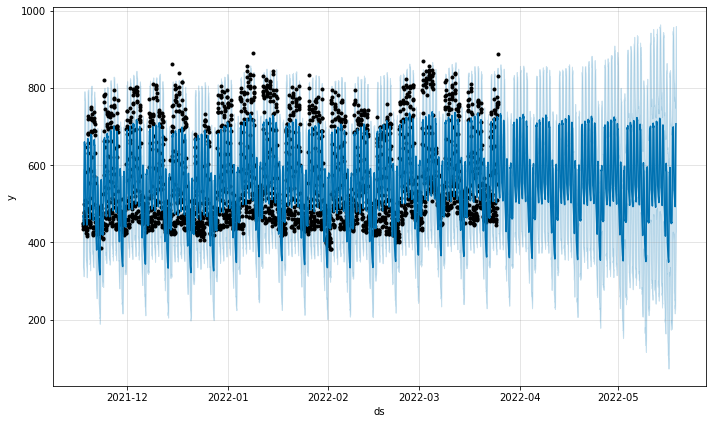

In [11]:
fig = m.plot(fcst);

In [10]:
p = go.Figure()
p.add_trace(go.Scatter(
    x = df.ds,
    y = df.y,
    mode = "lines",
    line = dict(color = "dodgerblue"),
    name = "original ts"
))
p.add_trace(go.Scatter(
    x = fcst.ds,
    y = fcst.yhat,
    mode = "lines",
    line = dict(color = "fuchsia"),
    name = "prediction (y_hat)"
))

p.show()

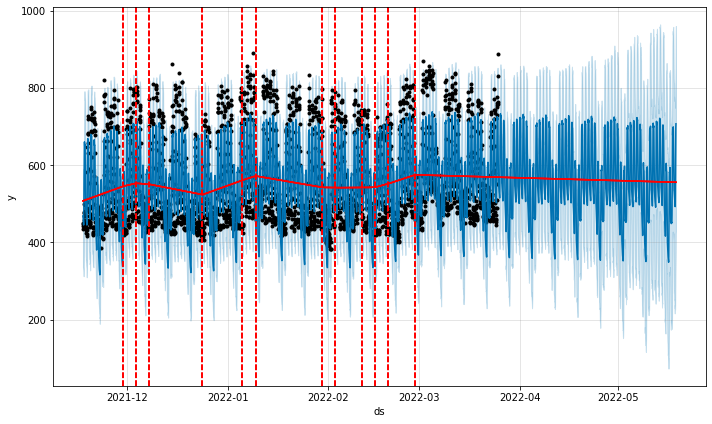

In [14]:
### Change Points
from prophet.plot import add_changepoints_to_plot

a = add_changepoints_to_plot(fig.gca(),m, fcst)
fig

In [16]:
# Mean squared error
from sklearn.metrics import mean_squared_error
print(f"Mean squared error : {mean_squared_error(y_true=df.y, y_pred = fcst.yhat)}")

Mean squared error : 5419.52276827911


# Prophet - Predict differencing(1)

In [43]:
# Predicting the difference between successive points instead of the values themeselves
df2 = df.copy()
df2["y"] = data["y"].diff()


In [45]:
px.line(df2, x = "ds", y = "y")

In [47]:
px.histogram(df2,x = "y",marginal = "violin")

In [51]:
df2_train = df2[:-test_size]
df2_test = df2[-test_size:]

print(f"df_train shape : {df_train.shape}")
print(f"df_test shape : {df_test.shape}")

df_train shape : (3066, 2)
df_test shape : (1314, 2)


In [61]:
m2 = Prophet(interval_width=0.95)
m2.fit(df2)
future2 = m1.make_future_dataframe(periods = test_size, freq="H")
fcst2 = m1.predict(future1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/Users/imantha/Software/miniforge3/envs/tsEnv/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Initial log joint probability = -26.6136
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8643.18   0.000191428       101.838           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     118        8643.3   0.000117072       129.287   1.075e-06       0.001      187  LS failed, Hessian reset 
     199       8643.45   1.94876e-06       94.0077      0.2378      0.2378      287   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     216       8643.45   3.98634e-07       89.3406      0.7156      0.7156      307   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/Users/imantha/Software/miniforge3/envs/tsEnv/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/imantha/Software/miniforge3/envs/tsEnv/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [62]:
fcst2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-11-17 12:00:00,-0.100461,-85.290580,63.013113,-0.100461,-0.100461,-9.997568,-9.997568,-9.997568,-10.088821,-10.088821,-10.088821,0.091253,0.091253,0.091253,0.0,0.0,0.0,-10.098029
1,2021-11-17 13:00:00,-0.100289,-81.073204,54.531474,-0.100289,-0.100289,-7.480705,-7.480705,-7.480705,-7.460677,-7.460677,-7.460677,-0.020028,-0.020028,-0.020028,0.0,0.0,0.0,-7.580994
2,2021-11-17 14:00:00,-0.100118,-70.971160,69.500769,-0.100118,-0.100118,-3.388206,-3.388206,-3.388206,-3.275602,-3.275602,-3.275602,-0.112604,-0.112604,-0.112604,0.0,0.0,0.0,-3.488324
3,2021-11-17 15:00:00,-0.099946,-77.650878,67.654874,-0.099946,-0.099946,-3.330261,-3.330261,-3.330261,-3.143783,-3.143783,-3.143783,-0.186478,-0.186478,-0.186478,0.0,0.0,0.0,-3.430207
4,2021-11-17 16:00:00,-0.099774,-74.299610,67.089495,-0.099774,-0.099774,-5.840016,-5.840016,-5.840016,-5.598146,-5.598146,-5.598146,-0.241870,-0.241870,-0.241870,0.0,0.0,0.0,-5.939791


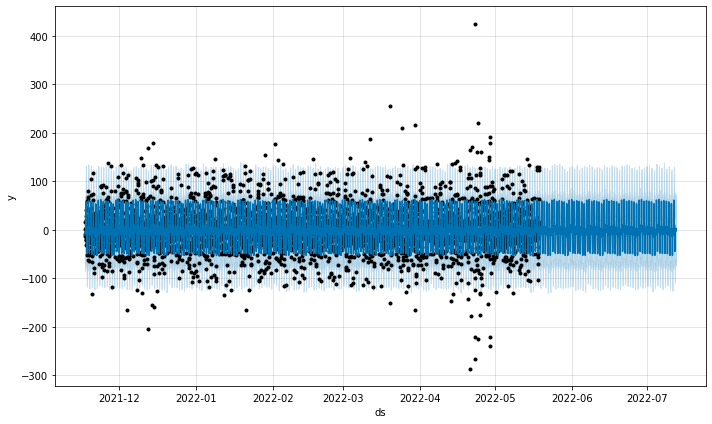

In [63]:
m2.plot(fcst2);

In [69]:
p2 = go.Figure()
p2.add_trace(go.Scatter(
    x = df2.ds,
    y = df2.y,
    mode = "lines",
    line = dict(color = "darkcyan"),
    name = "original ts"
))
p2.add_trace(go.Scatter(
    x = fcst2.ds,
    y = fcst2.yhat,
    mode = "lines",
    line = dict(color = "indianred"),
    name = "prediction"
))